In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Adquisición de datos

In [117]:
path = "BCW.csv"
df = pd.read_csv(path)
display(df)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

#Descripción de variables

Debido a que la medición de los nucleos célulares corresponde a un aspirado de un cierto número de ellas, existen 3 categorías para cada variable (excepto *id* y *diagnosis*): *mean*, *se* y *worst*. *mean* corresponde al valor medio, *se* al desvío estandar, y  *worst* la media de los 3 valores mas grandes. 
Las variables son:
- *id*: número identificador de la muestra
- *diagnosis*: variable a predecir, siendo M un tumor maligno y B benigno. 
- *raduis*: media de las distancias desde el centro a puntos en el borde
- *texture*: desviación estandar de la escala de grises, es decir, mientras mas variedad de grises haya mayor "textura" tiene el nucleo
- *perimeter*: perimetro
- *area*: area
- *smoothness*: suavidad, es decir variacion local en los radios. Mayores valores indican mas irregularidad en la superficie
- *compactness*: se define como (perimetro^2/area-1.0). De esta forma, nucleos con bordes mas irregulares presentan compactness mas grandes
- *concavity*: severidad de regiones concavas del contorno
- *concave points*: numero de puntos concavos en el contorno
- *symmetry*: simetria
- *fractal dimension*: otra medida de la irregularidad del contorno


#Descripción de variables

In [118]:
df.shape

(569, 33)

In [119]:
df.duplicated().value_counts()

False    569
Name: count, dtype: int64

No hay duplicados

In [120]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Hay una columna donde todos los valores son nulos. La trataremos posteriormente

In [121]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

Todas las columnas salvo la clasificación son numéricas. 
Concavity tiene un valor minimo de 0, veremos posteriormente la causa. El resto de las variables no parecen tener valores imposibles. 


#Data Wrangling y EDA

Descartamos la columna con nulls

In [122]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

Veremos que sucede con los valores de concavity = 0

In [123]:
df[df['concavity_mean']==0]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
101   862722         B        6.981         13.43           43.79      143.5   
140   868999         B        9.738         11.97           61.24      288.5   
174   871642         B       10.660         15.15           67.49      349.6   
175   872113         B        8.671         14.45           54.42      227.2   
192   875099         B        9.720         18.22           60.73      288.1   
314   894047         B        8.597         18.60           54.09      221.2   
391   903483         B        8.734         16.84           55.27      234.3   
473  9113846         B       12.270         29.97           77.42      465.4   
538   921092         B        7.729         25.49           47.98      178.8   
550   923748         B       10.860         21.48           68.51      360.5   
557   925236         B        9.423         27.88           59.26      271.3   
561   925311         B       11.200         29.37           70.67      386.0   
568    92751         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
101          0.11700           0.07568             0.0                  0.0   
140          0.09250           0.04102             0.0                  0.0   
174          0.08792           0.04302             0.0                  0.0   
175          0.09138           0.04276             0.0                  0.0   
192          0.06950           0.02344             0.0                  0.0   
314          0.10740           0.05847             0.0                  0.0   
391          0.10390           0.07428             0.0                  0.0   
473          0.07699           0.03398             0.0                  0.0   
538          0.08098           0.04878             0.0                  0.0   
550          0.07431           0.04227             0.0                  0.0   
557          0.08123           0.04971             0.0                  0.0   
561          0.07449           0.03558             0.0                  0.0   
568          0.05263           0.04362             0.0                  0.0   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
101  ...         7.930          19.54            50.41       185.2   
140  ...        10.620          14.10            66.53       342.9   
174  ...        11.540          19.20            73.20       408.3   
175  ...         9.262          17.04            58.36       259.2   
192  ...         9.968          20.83            62.25       303.8   
314  ...         8.952          22.44            56.65       240.1   
391  ...        10.170          22.80            64.01       317.0   
473  ...        13.450          38.05            85.08       558.9   
538  ...         9.077          30.92            57.17       248.0   
550  ...        11.660          24.77            74.08       412.3   
557  ...        10.490          34.24            66.50       330.6   
561  ...        11.920          38.30            75.19       439.6   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
101           0.15840            0.12020              0.0   
140           0.12340            0.07204              0.0   
174           0.10760            0.06791              0.0   
175           0.11620            0.07057              0.0   
192           0.07117            0.02729              0.0   
314           0.13470            0.07767              0.0   
391           0.14600            0.13100              0.0   
473           0.09422            0.05213              0.0   
538           0.12560            0.08340              0.0   
550           0.10010            0.07348              0.0   
557           0.10730            0.07158              0.0   
561           0.09267            0.05494              0.0   
568     

Los valores de area_mean parecen ser casi todos menores incluso al cuartil 25%. Todos son clasificados como benignos. Podemos pensar entonces que estos nucleos en particular son tan pequeñas que no poseen ninguna concavidad en su superficie. No es necesario eliminarlas del análisis ya que son datos válidos. 

#Variables numéricas

Tenemos un enorme numero de columnas. Voy a intentar filtrar algunas variables redundantes con un heat map. 

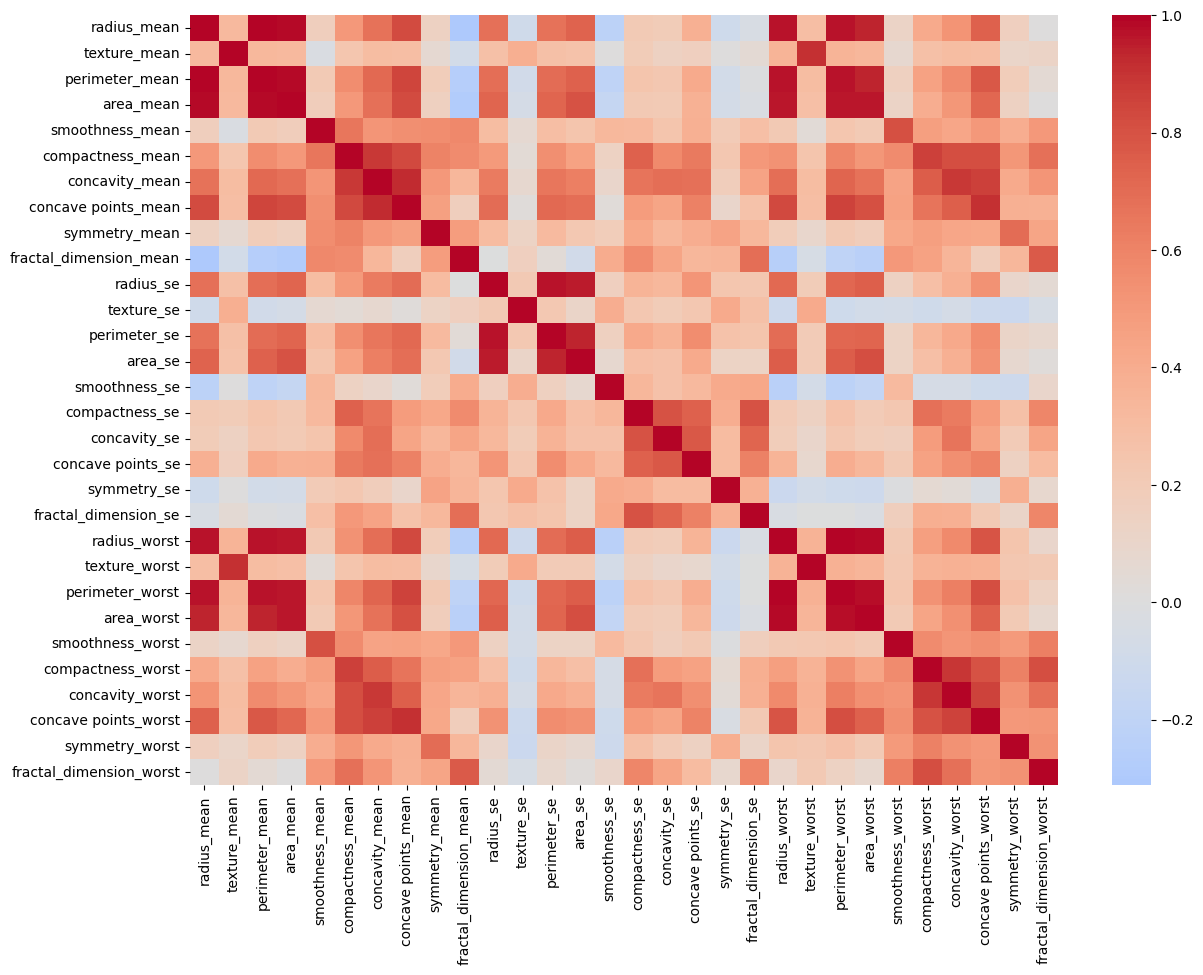

In [124]:
non_num_cols = [c for c in df.columns if c not in ("id", "diagnosis")]
plt.figure(figsize=(14,10))
sns.heatmap(df[non_num_cols].corr(), cmap="coolwarm", center=0)
plt.show()


Vemos algunas grandes correlaciones. Por ejemplo, radius_mean correlaciona fuertemente con perimeter_mean y area_mean, lo cual es logico ya que perimetro y area dependen del radio, pero tambien con radius_worst, perimeter_worst y area_worst, donde quizas no es tan obvia la correlacion (los tres valores mas grandes podrian ser siempre iguales sin importar el radio de los demas, por ejemplo). De estas 6 entonces voy a elegir solo una, radius_worst, ya que al seleccionar el promedio de los 3 valores más grandes captura las más anomalas. 

A su vez, las _se tambien correlacionan entre si. Vamos a dejar radius_se. (los _se no parecen correlacionar tanto con sus respectivas medias o worst)

Compactness, concavity y concave points representan tambien un grupo que correlacionan fuertemente entre si, tanto con sus _mean como sus _worst. Ya que compactness es la mas facil de entender de estas, elijo a compactness_worst como representativa de este otro grupo de 6. Igualmente, dejamos solo el _se de compactness.

Analogamente, fractal_



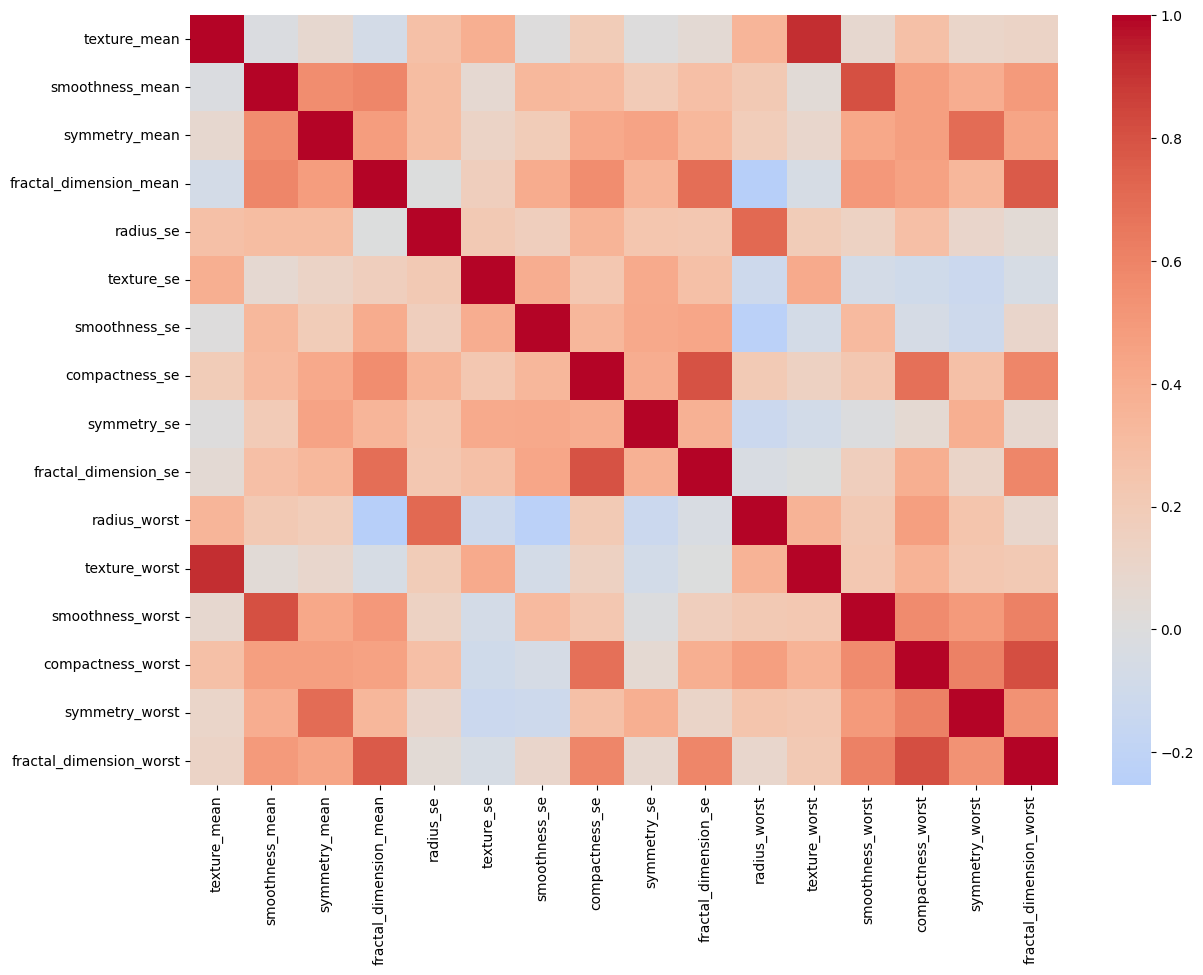

In [125]:
features_to_drop = ['radius_mean', 'perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst', 'perimeter_se', 'area_se', 'compactness_mean', 'concavity_mean',
                    'concave points_mean', 'concavity_worst', 'concave points_worst', 'concavity_se', 'concave points_se']
df=df.drop(features_to_drop, axis=1)
num_cols = [c for c in df.columns if c not in ("id", "diagnosis")]
plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.show()

Luego de limpiar un poco el heatmap vemos unas correlaciones mas entre _worst y _mean: texture, fractal_dimension, smoothness, y symmetry. Eliminamos entonces los _mean dejando solamente 12 columnas de variables numericas. 


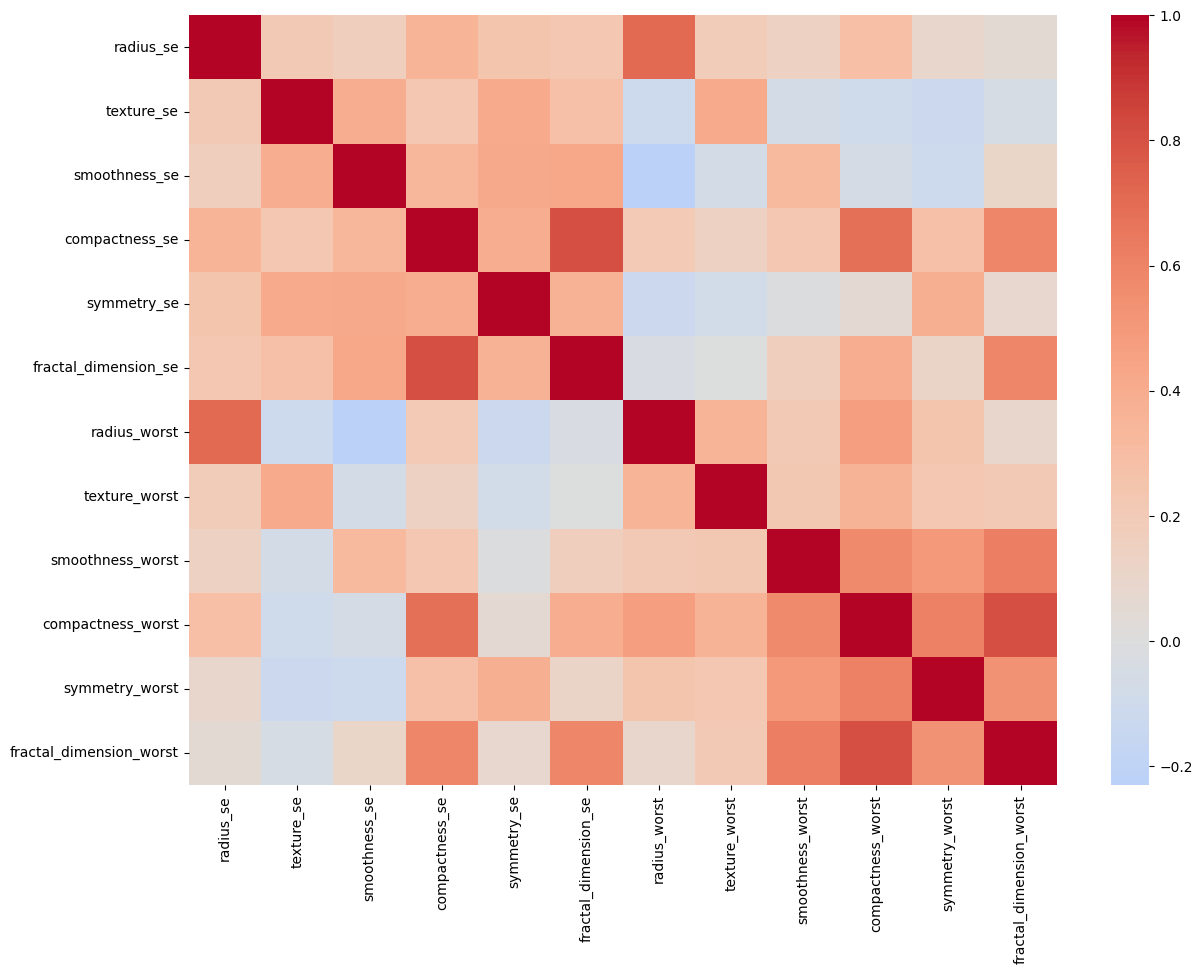

In [126]:
features_to_drop = ['texture_mean', 'fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean']
df=df.drop(features_to_drop, axis=1)
num_cols = [c for c in df.columns if c not in ("id", "diagnosis")]
plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.show()

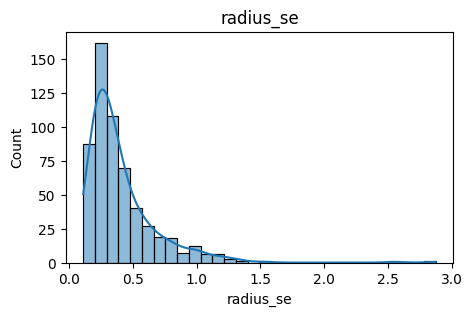

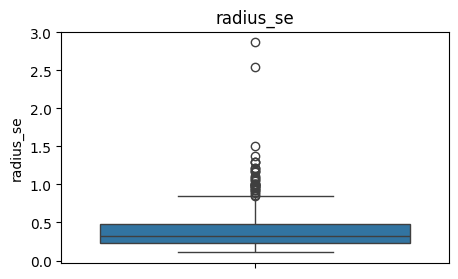

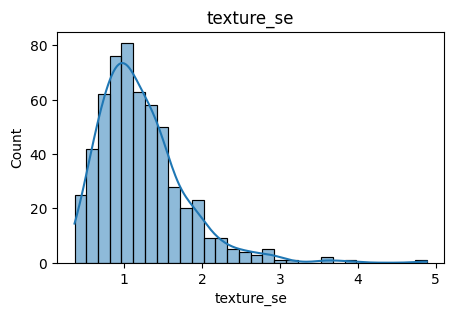

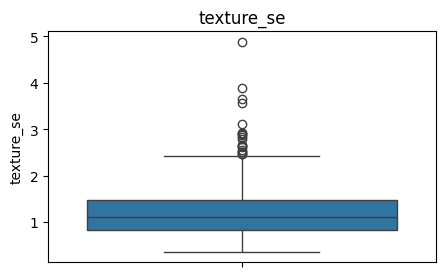

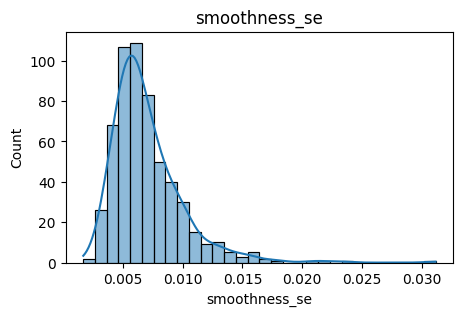

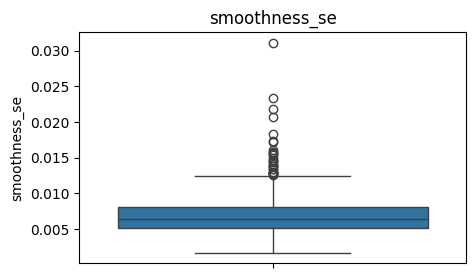

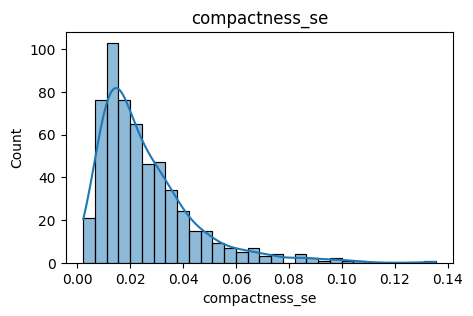

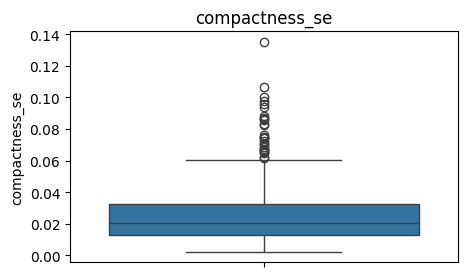

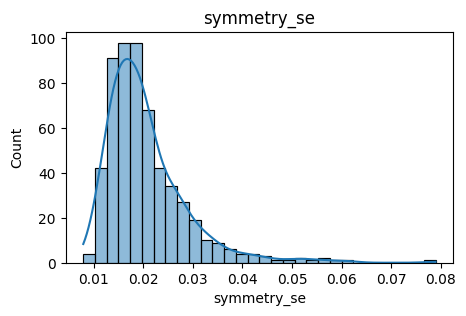

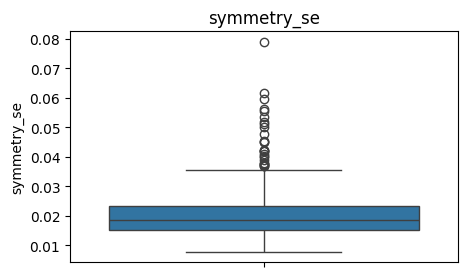

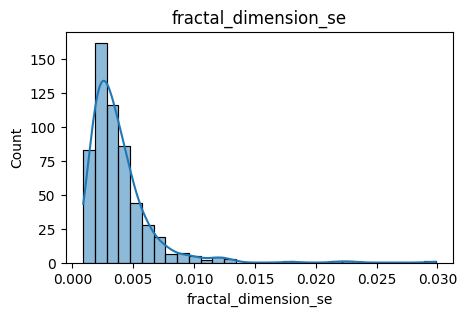

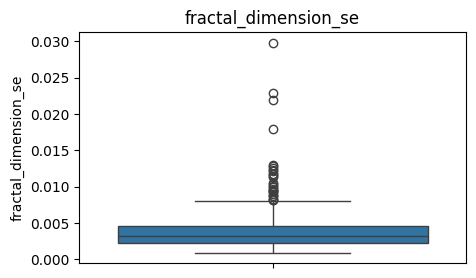

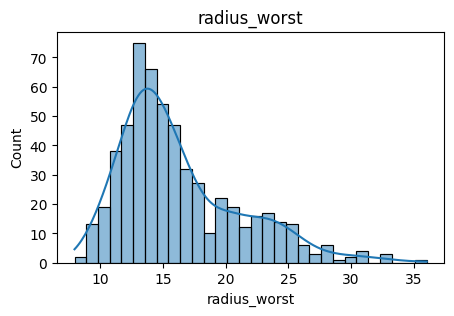

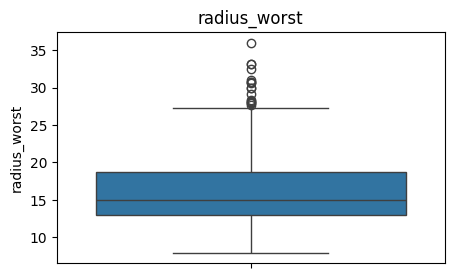

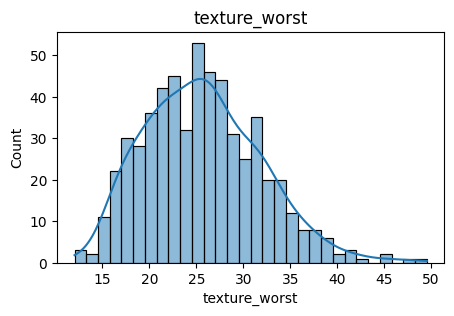

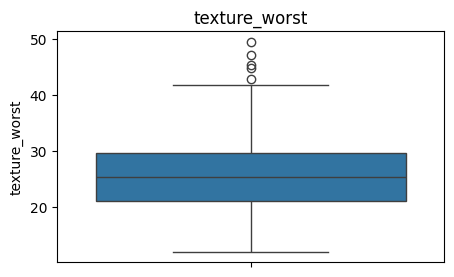

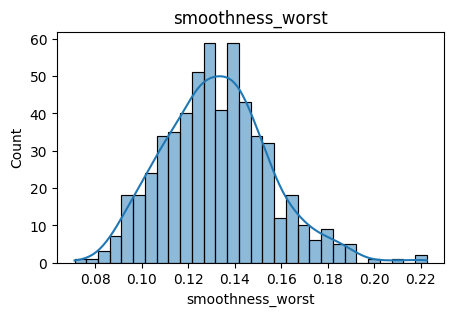

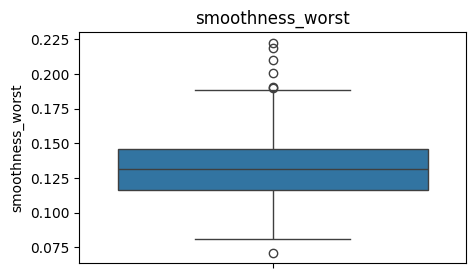

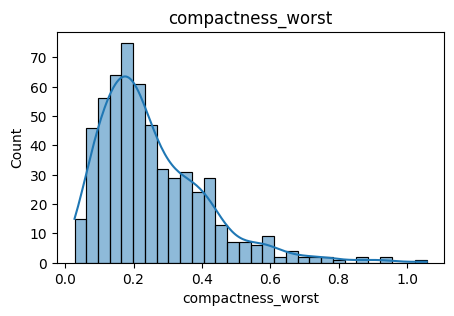

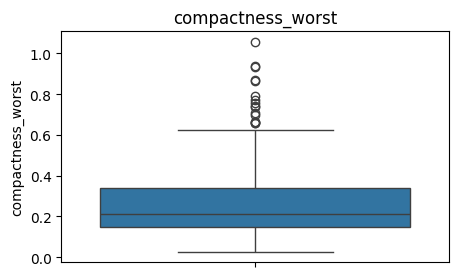

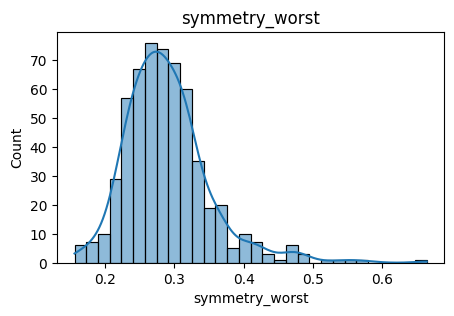

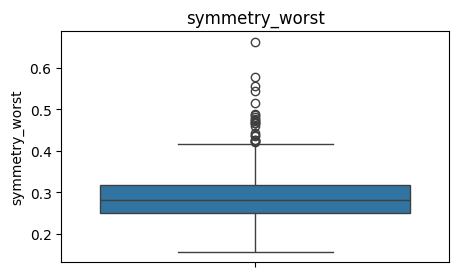

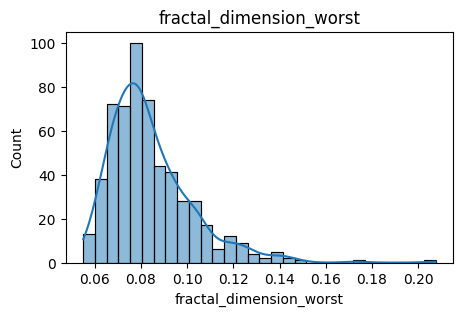

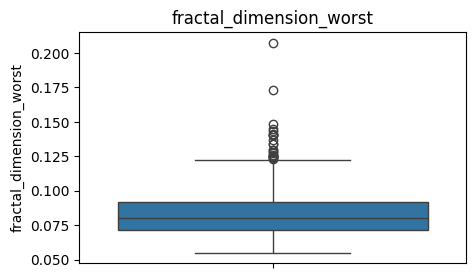

In [130]:
num_cols

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.show()
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

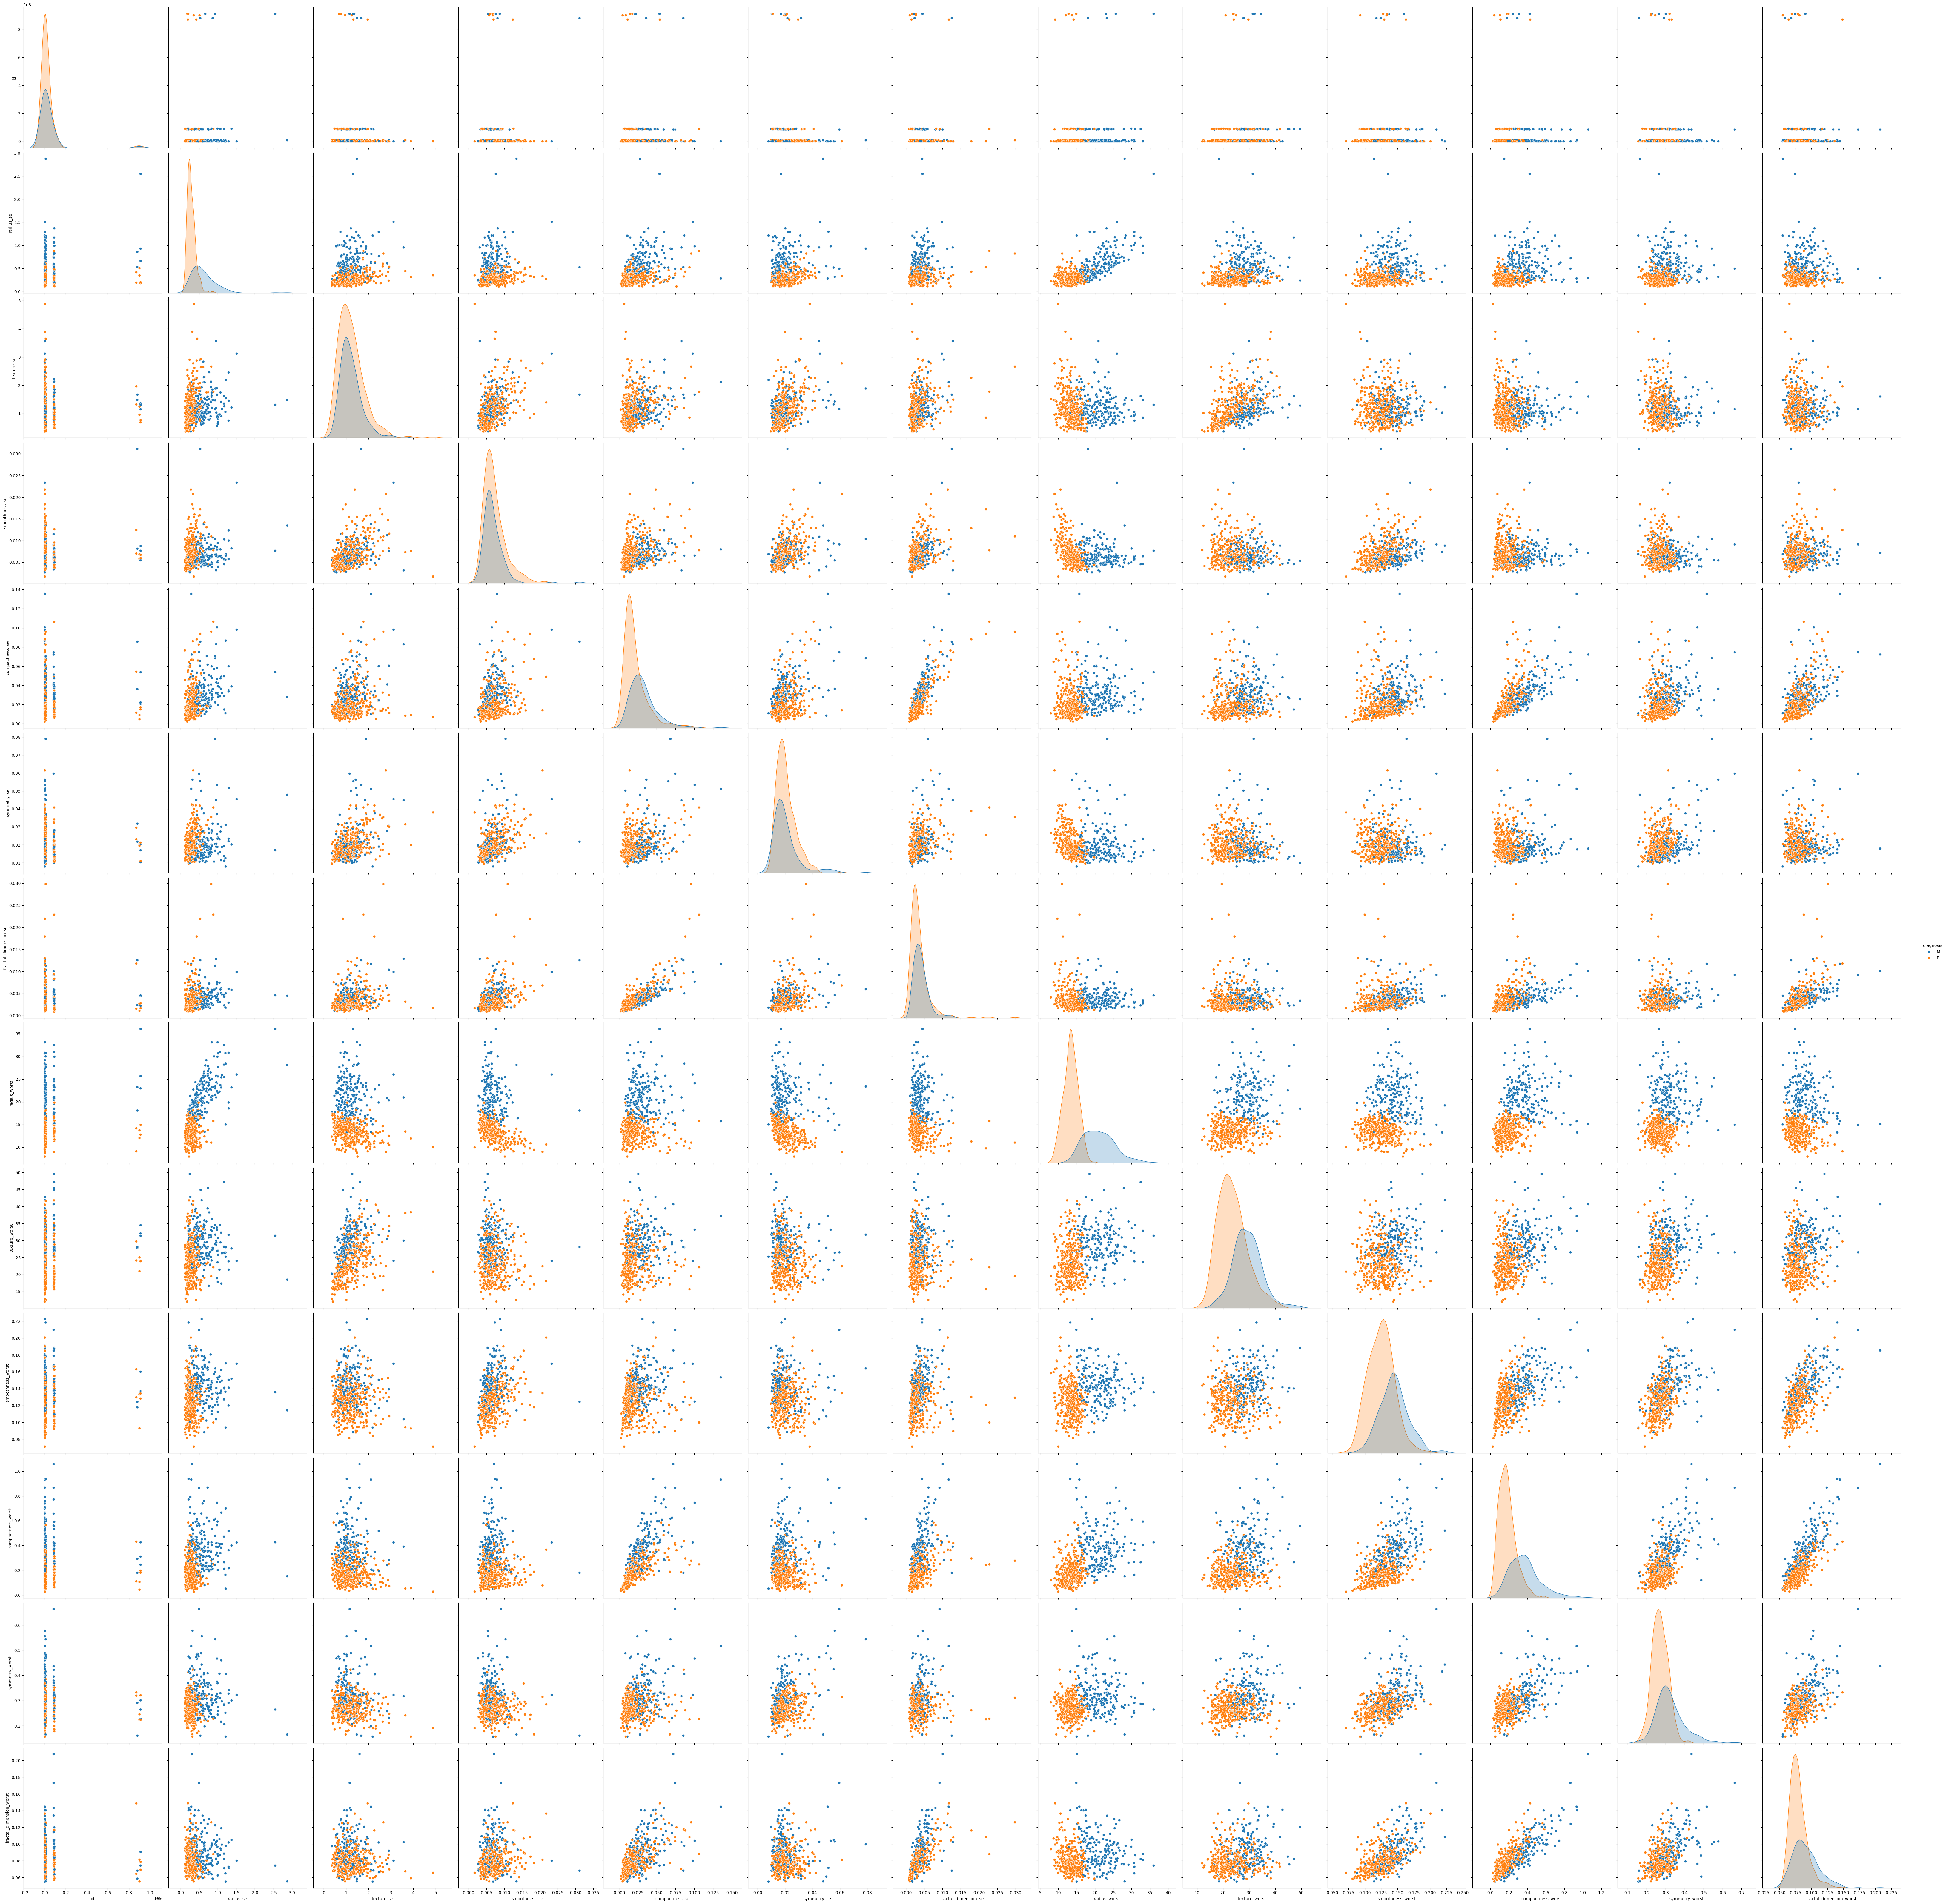

In [127]:
sns.pairplot(df, hue = 'diagnosis', height = 5)
plt.show()